In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [129]:
df = pd.read_csv('heart.csv', encoding='ISO-8859-1')

In [130]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## General

In [122]:
def gen(x):
    if x==0:
        return 'male'
    else:
        return 'female'

In [123]:
a=0
gen(a)

'male'

In [131]:
df['sex']=df['sex'].apply(lambda x: gen(x))

In [132]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,male,0,120,354,0,1,163,1,0.6,2,0,2,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [176]:
df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


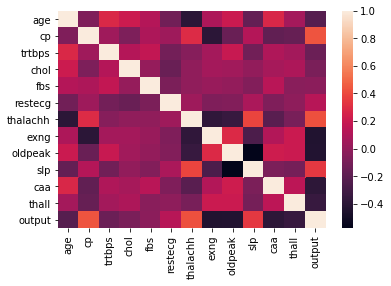

In [179]:
sns.heatmap(df.corr())

## Distribution Plots

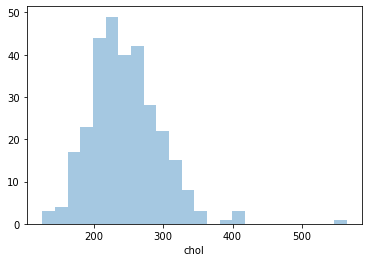

In [5]:
sns.distplot(df['chol'], kde=False)

Most people have cholestoral level between 200 and 300 mg/dl. 

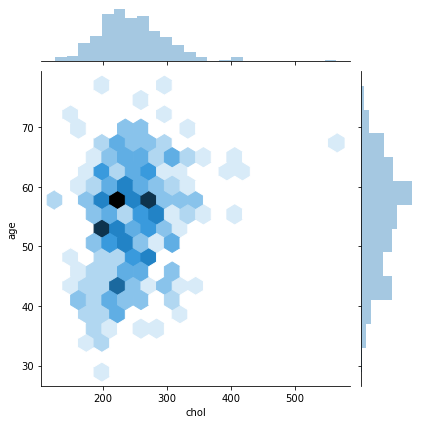

In [20]:
sns.jointplot(x='chol', y='age', data=df, kind='hex')

In [133]:
df1=df[['age', 'chol', 'sex', 'trtbps']]

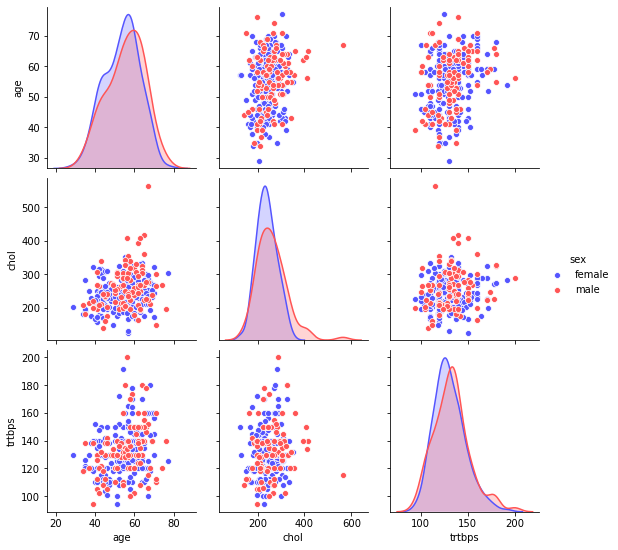

In [281]:
sns.pairplot(df1, hue='sex', palette='seismic')

## Categorical plots

Text(0.5, 1.0, 'Average cholesterol level by gender')

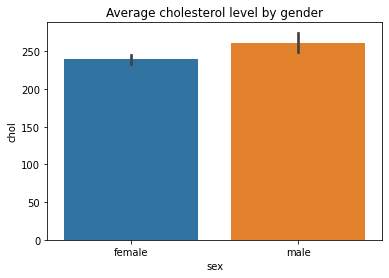

In [284]:
sns.barplot(x='sex', y='chol', data=df)
plt.title('Average cholesterol level by gender')

Text(0.5, 1.0, 'Number of people with or without fasting blood sugar')

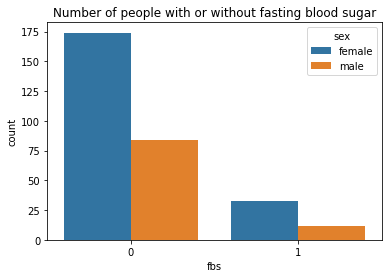

In [136]:
sns.countplot(x='fbs', data=df, hue='sex')
plt.title('Number of people with or without fasting blood sugar')

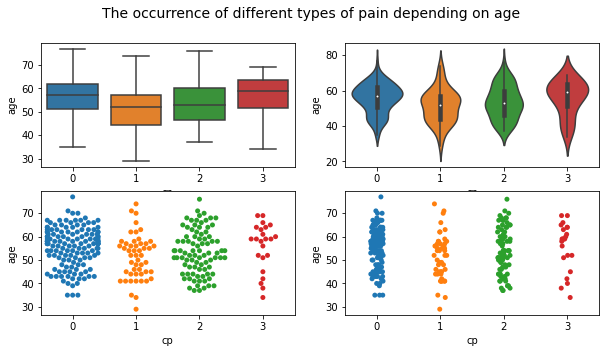

In [172]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('The occurrence of different types of pain depending on age', fontsize=14)
plt.subplot(2,2,1)
sns.boxplot(x='cp', y='age', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='cp', y='age', data=df)
plt.subplot(2,2,3)
sns.swarmplot(x='cp', y='age', data=df)
plt.subplot(2,2,4)
sns.stripplot(x='cp', y='age', data=df, jitter=True)


## Regression plots

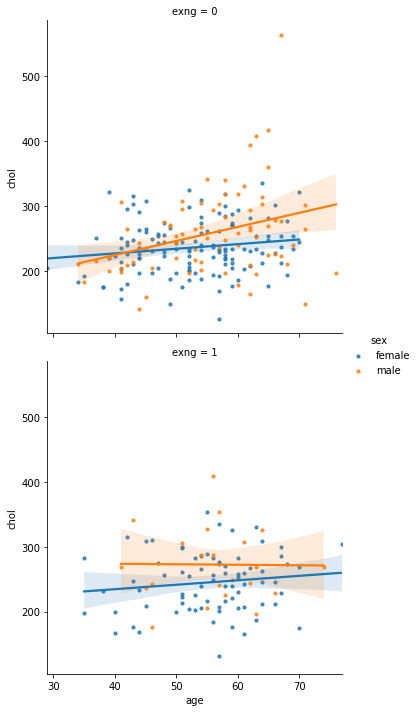

In [279]:
sns.lmplot(x='age', y='chol', data=df, row='exng',  hue='sex', scatter_kws={'s':10})

## Matrix Plots

In [180]:
sp = pd.read_csv('StudentsPerformance.csv', encoding='ISO-8859-1')

In [181]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [182]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [224]:
sp['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [184]:
ms=sp.pivot_table(index='parental level of education', columns='race/ethnicity', values='math score')
ms

race/ethnicity,group A,group B,group C,group D,group E
parental level of education,,,,,
associate's degree,61.000000,66.097561,66.730769,67.600000,74.897436
bachelor's degree,67.166667,69.300000,68.150000,67.571429,76.555556
high school,60.444444,59.791667,60.906250,62.863636,70.772727
master's degree,57.666667,67.166667,67.052632,72.521739,74.625000
some college,63.888889,63.189189,65.130435,68.731343,73.828571
some high school,58.916667,61.815789,60.551020,66.760000,72.111111


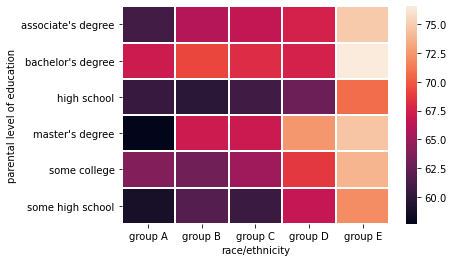

In [185]:
sns.heatmap(ms, linecolor='white', linewidths=1)

Text(0.5, 1.0, 'Writing score')

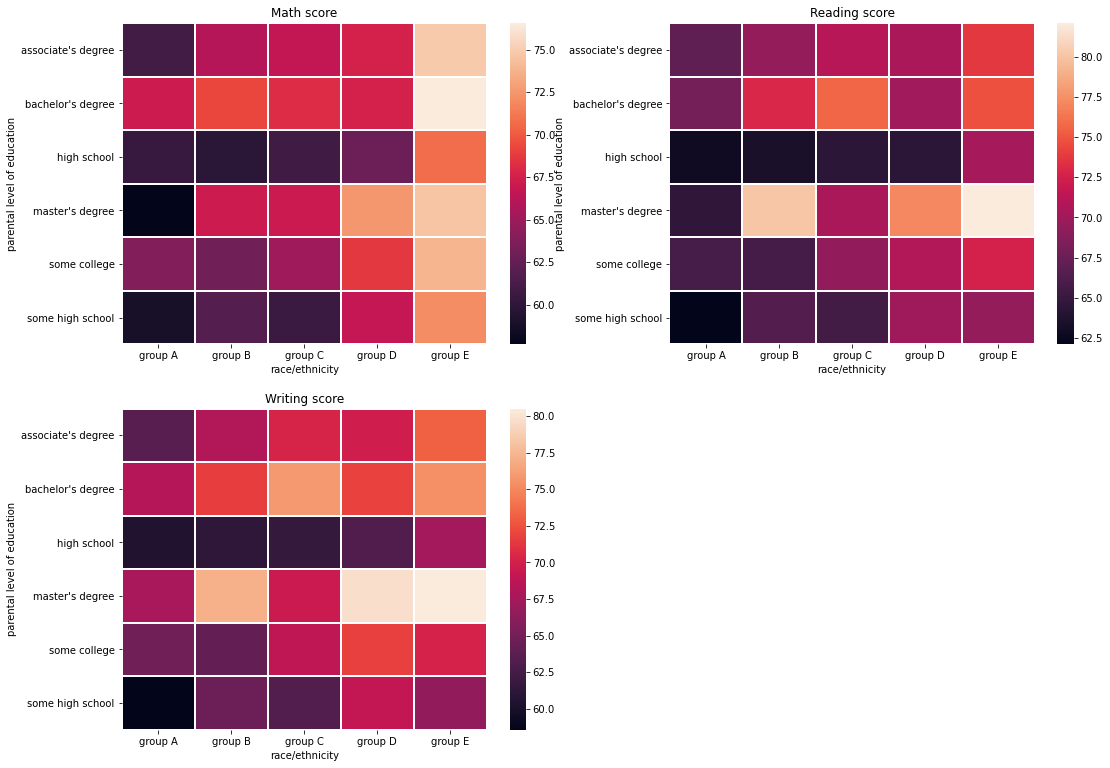

In [219]:
fig = plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
ms=sp.pivot_table(index='parental level of education', columns='race/ethnicity', values='math score')
sns.heatmap(ms, linecolor='white', linewidths=1)
plt.title('Math score')

plt.subplot(2,2,2)
ms=sp.pivot_table(index='parental level of education', columns='race/ethnicity', values='reading score')
sns.heatmap(ms, linecolor='white', linewidths=1)
plt.title('Reading score')

plt.subplot(2,2,3)
ms=sp.pivot_table(index='parental level of education', columns='race/ethnicity', values='writing score')
sns.heatmap(ms, linecolor='white', linewidths=1)
plt.title('Writing score')

## Grids

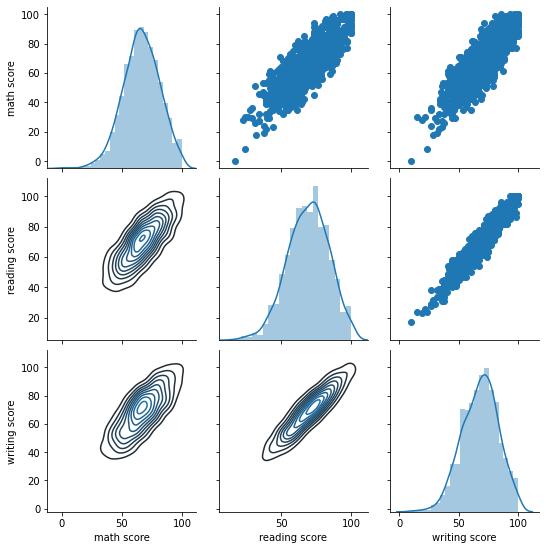

In [235]:
g = sns.PairGrid(sp)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)

In [246]:
sp['total score']=sp['math score']+sp['writing score']+sp['reading score']

In [267]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


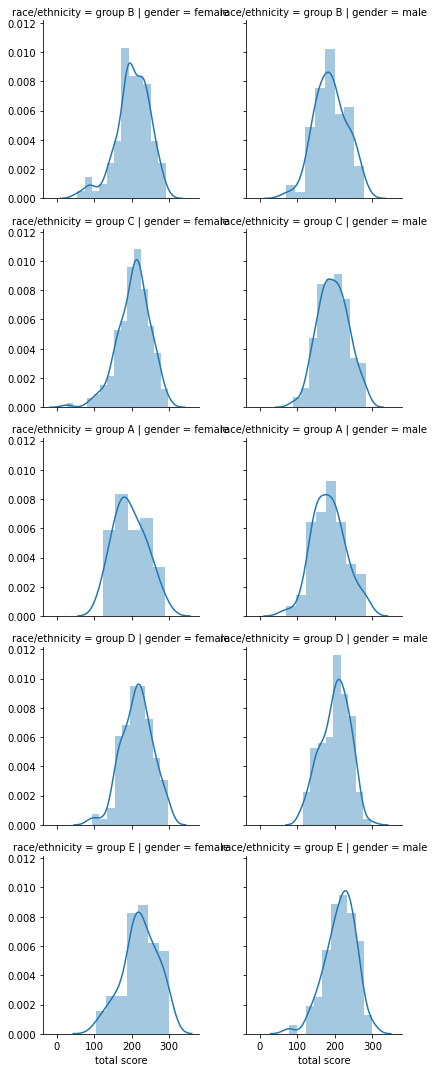

In [265]:
g = sns.FacetGrid(data=sp, col='gender', row='race/ethnicity')
g.map(sns.distplot,'total score')